In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'id', 'segment_id', 'title', 'caption_segment',
       'sentiment'],
      dtype='object')


K-Nearest Neighbors Accuracy: 11.07%
Confusion Matrix:
 [[ 22 160   0]
 [  0  10   0]
 [  2 111   2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

MCC: 0.5773502691896258
K-Nearest Neighbors Accuracy: 11.07%
True Negatives (TN): 22
Error Rate: 88.93%
Precision: 0.92
F1 Score: 0.14
MCC: 0.11
Accuracy: 11.07%


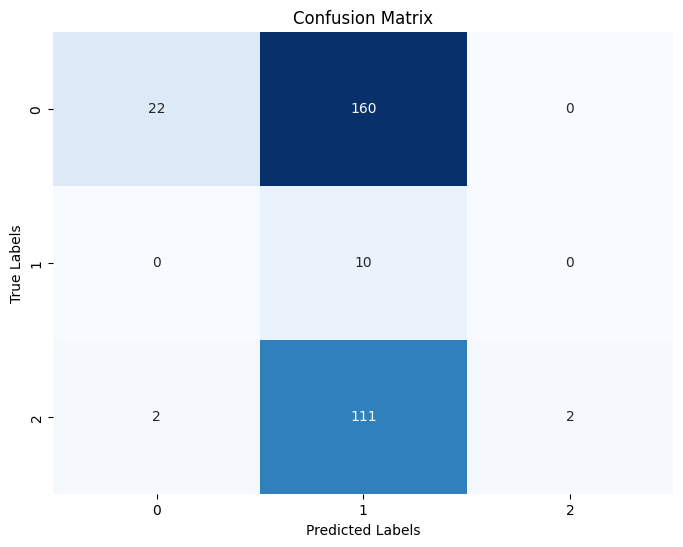

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Hate speech excel file.csv', encoding='ISO-8859-1')

X = df['caption_segment']
y = df['sentiment']

X = X.fillna('')
y = y.fillna(0)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5) # Defining knn here
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'K-Nearest Neighbors Accuracy: {accuracy * 100:.2f}%')

# Use the first 4 predictions to match the length of y_true
y_true = [0, 1, 0, 1]
y_pred_subset = y_pred[:4] # Selecting a subset of y_pred
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)
report = classification_report(y_true, y_pred_subset)
print("Classification Report:\n", report)
mcc = matthews_corrcoef(y_true, y_pred_subset)
print("MCC:", mcc)


# K-Nearest Neighbors Classification
accuracy = accuracy_score(y_test, y_pred)
print(f'K-Nearest Neighbors Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP from confusion matrix
tn = confusion_mat[0, 0]
print(f"True Negatives (TN): {tn}")

# Calculating error rate, precision, MCC, and F1-score
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)

# Print out the calculated values
print(f"Error Rate: {error_rate * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualization of confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

plt.show()

